In [544]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [364]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [543]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [366]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00000,2,2,1,24,...,689.00000,0.00000,0.00000,0.00000,0.00000,1
1,2,120000.00000,2,2,2,26,...,1000.00000,1000.00000,1000.00000,0.00000,2000.00000,1
2,3,90000.00000,2,2,2,34,...,1500.00000,1000.00000,1000.00000,1000.00000,5000.00000,0
3,4,50000.00000,2,2,1,37,...,2019.00000,1200.00000,1100.00000,1069.00000,1000.00000,0
4,5,50000.00000,1,2,1,57,...,36681.00000,10000.00000,9000.00000,689.00000,679.00000,0


In [367]:
print(df.shape)

(30000, 25)


This dataset contains 30000 rows and 25 columns.

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

I have to change features PAY_0 to be PAY_1, and default.payment.next.month to be default_payment.

In [369]:
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'default_payment'}, inplace = True)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_1              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-nu

# Categorical Values

In [371]:
cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 'default_payment']
df[cat].describe(include = 'all')

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment
count,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000
mean,1.60373,1.85313,1.55187,-0.01670,-0.13377,-0.16620,-0.22067,-0.26620,-0.29110,0.22120
std,0.48913,0.79035,0.52197,1.12380,1.19719,1.19687,1.16914,1.13319,1.14999,0.41506
min,1.00000,0.00000,0.00000,-2.00000,-2.00000,-2.00000,-2.00000,-2.00000,-2.00000,0.00000
25%,1.00000,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000
50%,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,2.00000,6.00000,3.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,1.00000


### Finding null value and unique values for each feature

In [372]:
for cat_value in cat:
    print('{0} -> isnull: {1}, unique values: {2}'.format(cat_value, df[cat_value].isnull().values.any(), 
                                                          sorted(df[cat_value].unique())))

SEX -> isnull: False, unique values: [1, 2]
EDUCATION -> isnull: False, unique values: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE -> isnull: False, unique values: [0, 1, 2, 3]
PAY_1 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 -> isnull: False, unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 -> isnull: False, unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default_payment -> isnull: False, unique values: [0, 1]


No null values in these columns. 

In [373]:
# Data description
sex_option = {'1' : 'Male', '2' : 'Female'}
education_option = {'0' : 'Graduate school', '1' : 'University', '2' : 'High school', '3' : 'Others'}
marriage_option = {'0' : 'Others', '1' : 'Married', '2' : 'Single', '3' : 'Divorce'}
pay_option = {'-2' : 'No consumption', '-1' : 'Duly pay', '0' : 'Pay', '1' : 'Delay 1', 
              '2' : 'Delay 2', '3' : 'Delay 3', '4' : 'Delay 4', '5' : 'Delay 5', 
              '6' : 'Delay 6', '7' : 'Delay 7', '8' : 'Delay 8'}
default_payment_option = {'0' : 'No', '1' : 'Yes'}

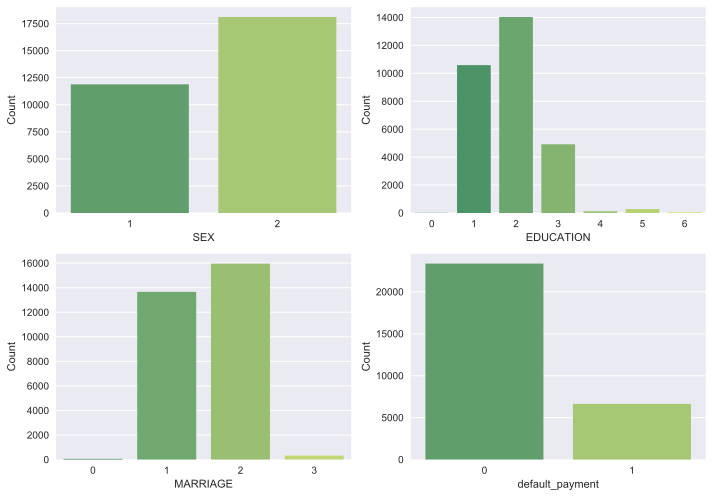

In [374]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.countplot(x = feat, data = df, ax = ax, palette = "summer"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
fig.tight_layout();

According to data description, Education should be only 0, 1, 2, 3.
Let's change incorrect values to be 3.

In [375]:
df['EDUCATION'] = df['EDUCATION'].map({0:0, 1:1, 2:2, 3:3, 4:3, 5:3, 6:3})

In [376]:
# Mapper is used to map the label with value.
data_mapper = {'SEX' : sex_option, 'EDUCATION' : education_option, 
               'MARRIAGE' : marriage_option, 'default_payment' : default_payment_option }

Then plot the graphs again.

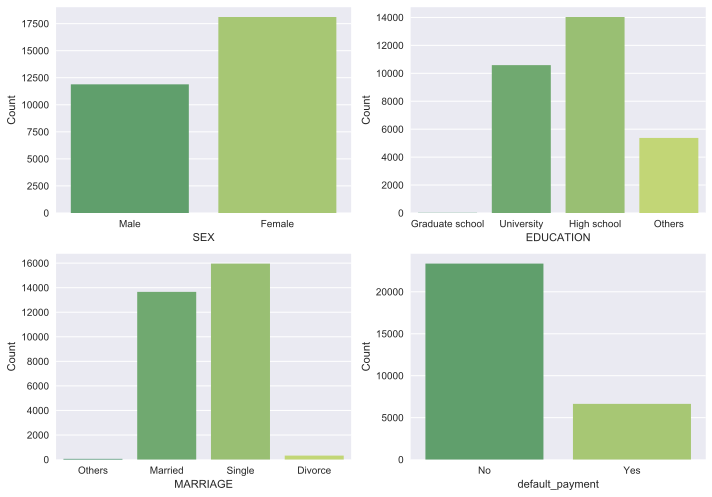

In [377]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.countplot(x = feat, data = df, ax = ax, palette = "summer"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
    ax.set_xticklabels([ data_mapper.get(feat)[k] for k in [item.get_text() for item in ax.get_xticklabels()]], 
                       fontsize=10)
        
fig.tight_layout();

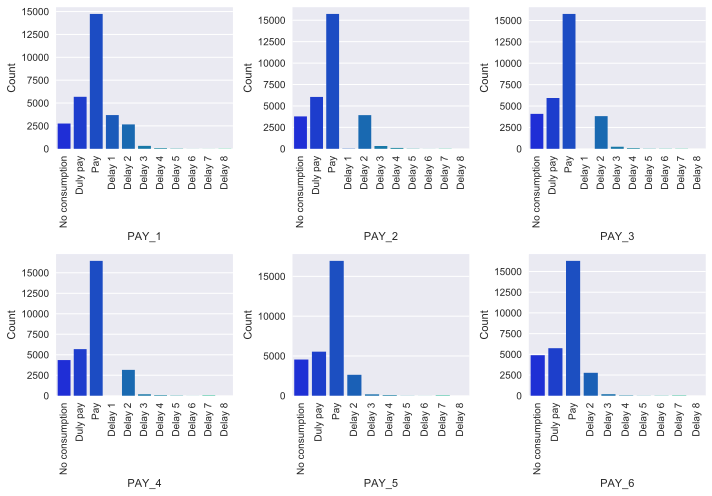

In [378]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7))

for idx, feat in enumerate(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']): 
    ax = axes[int(idx / 3), idx % 3] 
    g = sns.countplot(x = feat, data = df, ax = ax, palette = "winter"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
    ax.set_xticklabels([ pay_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], 
                       rotation='vertical', fontsize=10)

fig.tight_layout();


PAY_5 and PAY_6 do not contain Delay 1 value in this dataset.

# Numerical Values

In [379]:
num = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [380]:
df[num].loc[:, 'LIMIT_BAL' : 'BILL_AMT6'].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000
mean,167484.32267,35.48550,51223.33090,49179.07517,47013.15480,43262.94897,40311.40097,38871.76040
std,129747.66157,9.21790,73635.86058,71173.76878,69349.38743,64332.85613,60797.15577,59554.10754
min,10000.00000,21.00000,-165580.00000,-69777.00000,-157264.00000,-170000.00000,-81334.00000,-339603.00000
25%,50000.00000,28.00000,3558.75000,2984.75000,2666.25000,2326.75000,1763.00000,1256.00000
50%,140000.00000,34.00000,22381.50000,21200.00000,20088.50000,19052.00000,18104.50000,17071.00000
75%,240000.00000,41.00000,67091.00000,64006.25000,60164.75000,54506.00000,50190.50000,49198.25000
max,1000000.00000,79.00000,964511.00000,983931.00000,1664089.00000,891586.00000,927171.00000,961664.00000


The maximum and minimum value of each column is totally different. I will clear the outlier later.

In addition, BILL_AMTX also have negative values. It means there is an excess amount of the payment from previous months.

In [381]:
df[num].loc[:, 'PAY_AMT1' : 'PAY_AMT6'].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000
mean,5663.58050,5921.16350,5225.68150,4826.07687,4799.38763,5215.50257
std,16563.28035,23040.87040,17606.96147,15666.15974,15278.30568,17777.46578
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1000.00000,833.00000,390.00000,296.00000,252.50000,117.75000
50%,2100.00000,2009.00000,1800.00000,1500.00000,1500.00000,1500.00000
75%,5006.00000,5000.00000,4505.00000,4013.25000,4031.50000,4000.00000
max,873552.00000,1684259.00000,896040.00000,621000.00000,426529.00000,528666.00000


The minimum value is zero, which means no payment in that month.

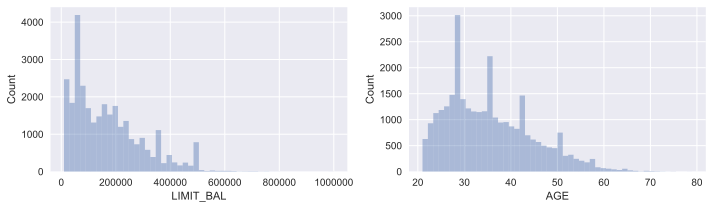

In [382]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 3))

for idx, feat in enumerate(['LIMIT_BAL', 'AGE']): 
    ax = axes[idx] 
    sns.distplot(df[feat], kde = False, ax = ax);
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
fig.tight_layout();



The distribution of LIMIT_BAL and AGE seem to be heavy tail distribution. I will remove some outliers in both columns.

The value should be between (Mean - 3SD) and (Mean + 3SD).

In [383]:
outlier_LITMIT_BAL = df['LIMIT_BAL'].mean() + 3 * df['LIMIT_BAL'].std()
print('The LIMIT_BAL is greater than {0} will be outlier, which is {1} rows.'
      .format(outlier_LITMIT_BAL, df.LIMIT_BAL[df['LIMIT_BAL'] > outlier_LITMIT_BAL].count()))


The LIMIT_BAL is greater than 556727.3073682518 will be outlier, which is 130 rows.


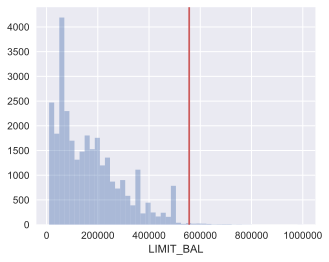

In [384]:
sns.distplot(df.LIMIT_BAL, kde = False);
plt.axvline(x = outlier_LITMIT_BAL, color = 'indianred')

After removing the outlier, I plot the histogram again.

I found that the most popular limit balance of this dataset is 50,000.
While the second one is around 15,000.

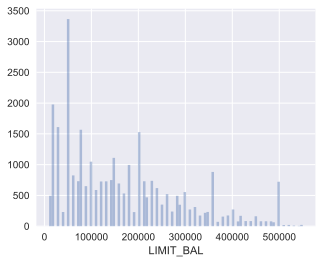

In [385]:
sns.distplot(df.LIMIT_BAL[df['LIMIT_BAL'] < outlier_LITMIT_BAL], kde=False, bins=100);

I do not clear the outlier in AGE because the minimum and maximum value are acceptable.

I transform the AGE column to be age ranges and plot the bar chart.

In [386]:
bins = [12, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Senior', 'Elderly']
df['AGE_group'] = pd.cut(df['AGE'], bins = bins, labels = labels)

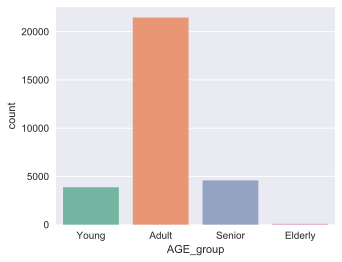

In [387]:
sns.countplot(x='AGE_group', data=df, palette="Set2");

Moving to the BILL_AMT features, I do the similar way to eliminate the outliers.

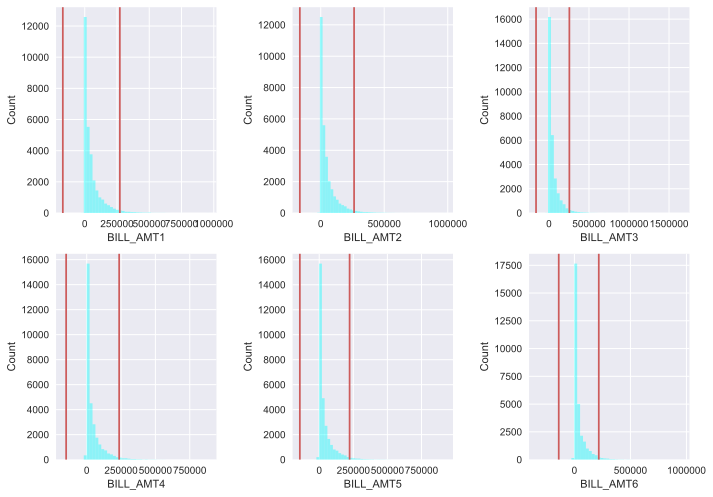

In [416]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7))

for idx, feat in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat], kde = False, ax = ax, color = "aqua")
    ax.axvline(x = min_outlier, color = 'indianred')
    ax.axvline(x = max_outlier, color = 'indianred')
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
fig.tight_layout();


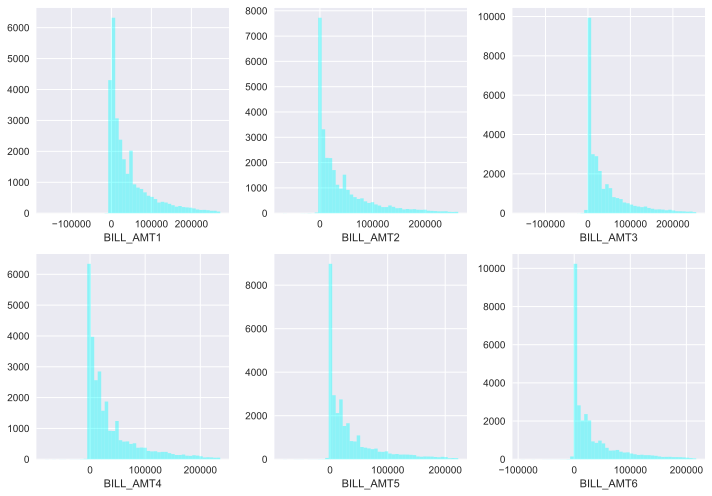

In [417]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7))

for idx, feat in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat][(df[feat] > min_outlier) & (df[feat] < max_outlier)], kde = False, ax = ax, color = "aqua")
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


It seems that most BILL_AMT are closer to zero. So I pick BILL_AMT1 to explore it more.

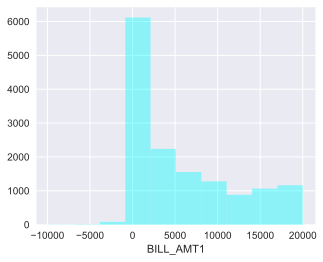

In [418]:
min_outlier = df['BILL_AMT1'].mean() - 3 * df['BILL_AMT1'].std()
max_outlier = df['BILL_AMT1'].mean() + 3 * df['BILL_AMT1'].std()
sns.distplot(df['BILL_AMT1'][(df['BILL_AMT1'] > min_outlier) & (df['BILL_AMT1'] < max_outlier) &
                            (df['BILL_AMT1'] >= -10000) & (df['BILL_AMT1'] <= 20000)], kde = False, bins = 10, color = "aqua")

According to the histogram, many amount in BILL_AMT is less than 5,000.

Next I will explore PAY_AMT columns.

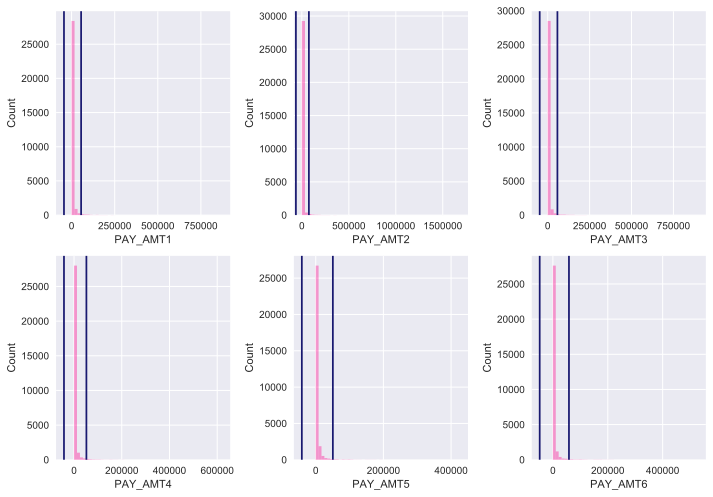

In [422]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat], kde=False, ax=ax, color = "deeppink")
    ax.axvline(x=min_outlier, color='midnightblue')
    ax.axvline(x=max_outlier, color='midnightblue')
    ax.set_xlabel(feat) 
    ax.set_ylabel('Count') 
fig.tight_layout();


After eliminating the outliers,

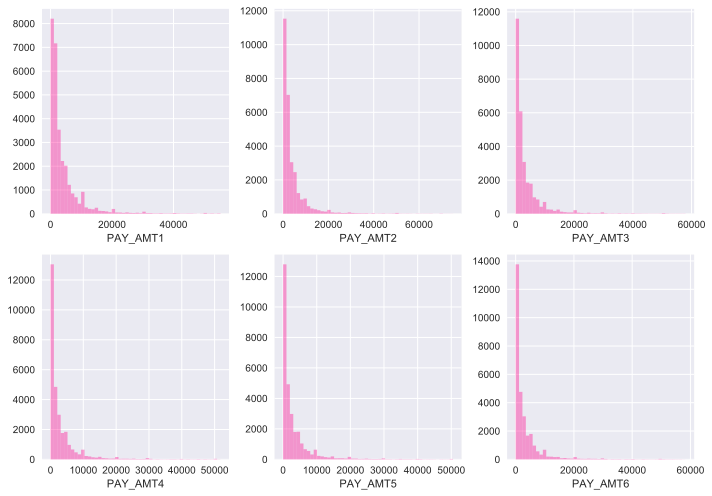

In [423]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat][(df[feat] > min_outlier) & (df[feat] < max_outlier)], kde=False, ax=ax, color = "deeppink")
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


I explore the PAY_AMT1 as same as the BIL_AMT1.

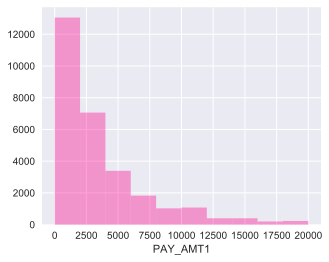

In [424]:
min_outlier = df['PAY_AMT1'].mean() - 3 * df['PAY_AMT1'].std()
max_outlier = df['PAY_AMT1'].mean() + 3 * df['PAY_AMT1'].std()
sns.distplot(df['PAY_AMT1'][(df['PAY_AMT1'] > min_outlier) & (df['PAY_AMT1'] < max_outlier) &
                            (df['PAY_AMT1'] >= 0) & (df['PAY_AMT1'] <= 20000)], kde = False, bins = 10, color = "deeppink")

Most payment amount are less than 2,500.

I decide to remove the rows, which contain the outlier in PAY_AMT1-6, BILL_AMT1-6 and LIMIT_BAL columns.

In [394]:
dataset = df[(df['LIMIT_BAL'] < df['LIMIT_BAL'].mean() + 3 * df['LIMIT_BAL'].std()) &
   (df['BILL_AMT1'] > df['BILL_AMT1'].mean() - 3 * df['BILL_AMT1'].std()) &
   (df['BILL_AMT1'] < df['BILL_AMT1'].mean() + 3 * df['BILL_AMT1'].std()) &
             
   (df['BILL_AMT2'] > df['BILL_AMT2'].mean() - 3 * df['BILL_AMT2'].std()) &
   (df['BILL_AMT2'] < df['BILL_AMT2'].mean() + 3 * df['BILL_AMT2'].std()) &
             
   (df['BILL_AMT3'] > df['BILL_AMT3'].mean() - 3 * df['BILL_AMT3'].std()) &
   (df['BILL_AMT3'] < df['BILL_AMT3'].mean() + 3 * df['BILL_AMT3'].std()) &
             
   (df['BILL_AMT4'] > df['BILL_AMT4'].mean() - 3 * df['BILL_AMT4'].std()) &
   (df['BILL_AMT4'] < df['BILL_AMT4'].mean() + 3 * df['BILL_AMT4'].std()) &
             
   (df['BILL_AMT5'] > df['BILL_AMT5'].mean() - 3 * df['BILL_AMT5'].std()) &
   (df['BILL_AMT5'] < df['BILL_AMT5'].mean() + 3 * df['BILL_AMT5'].std()) &
             
   (df['BILL_AMT6'] > df['BILL_AMT6'].mean() - 3 * df['BILL_AMT6'].std()) &
   (df['BILL_AMT6'] < df['BILL_AMT6'].mean() + 3 * df['BILL_AMT6'].std()) &
             
   (df['PAY_AMT1'] < df['PAY_AMT1'].mean() + 3 * df['PAY_AMT1'].std()) &
   (df['PAY_AMT2'] < df['PAY_AMT2'].mean() + 3 * df['PAY_AMT2'].std()) &
   (df['PAY_AMT3'] < df['PAY_AMT3'].mean() + 3 * df['PAY_AMT3'].std()) &
   (df['PAY_AMT4'] < df['PAY_AMT4'].mean() + 3 * df['PAY_AMT4'].std()) &
   (df['PAY_AMT5'] < df['PAY_AMT5'].mean() + 3 * df['PAY_AMT5'].std()) &
   (df['PAY_AMT6'] < df['PAY_AMT6'].mean() + 3 * df['PAY_AMT6'].std())]

In [395]:
dataset.shape

(27199, 26)

I removed around 2800 rows containing the outliers from the dataset.

## Correlation between varaibles

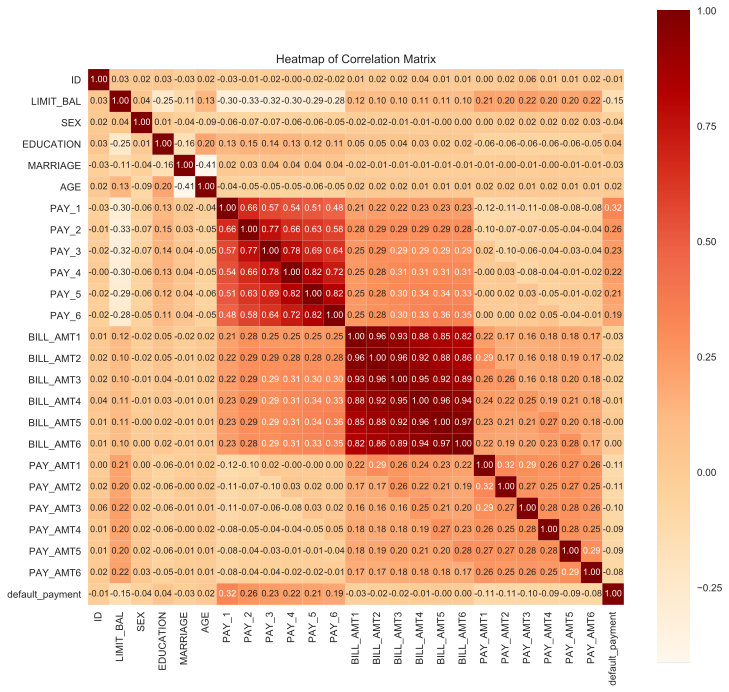

In [438]:
corr=dataset.corr()
corr = (corr)
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9}, cmap='OrRd',
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The PAYX variables have a strong relationship with each other. The first assumption is the consumers who always pay the bill on time, they tend to behave the same in other months. Due to the correlation of BILL_AMTX, the bill amount is quite similar in each month.

The second assumption is the LIMIT_BAL has a negative relationship with PAY_X. If credit card holders have high LIMIT_BAL amount, they might do the payment in time. Lastly, if the age of customers is high, they might be married (negative correlation).

Looking at the correlation of default_payment, LIMIT_BAL, PAY_X, and PAY_AMTX tend to have an influence to default_payment.

# Finding relations between variables with target variable

The target variable is default_payment. 

0    20968
1     6231
Name: default_payment, dtype: int64


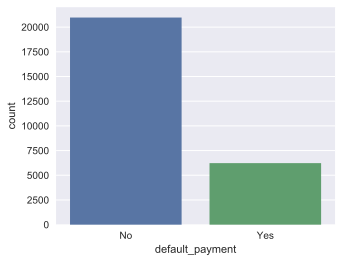

In [403]:
print(dataset['default_payment'].value_counts())
ax = sns.countplot(x='default_payment', data=dataset);
ax.set_xticklabels([default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
plt.show()

In [398]:
dataset['default_payment'].mean()

0.22908930475385125

The amount of default_payment, equals 1, in this dataset is around 22.90%. 

Then, I find the means of each feature seperated by the default_payment value.

In [439]:
dataset.groupby('default_payment').mean().unstack()

           default_payment
ID         0                  15024.52666
           1                  14769.25197
LIMIT_BAL  0                 162103.77718
           1                 118876.58482
SEX        0                      1.61947
           1                      1.56797
EDUCATION  0                      1.82173
           1                      1.89360
MARRIAGE   0                      1.56157
           1                      1.53025
AGE        0                     35.27447
           1                     35.60825
PAY_1      0                     -0.19916
           1                      0.67052
PAY_2      0                     -0.29440
           1                      0.46541
PAY_3      0                     -0.31033
           1                      0.37041
PAY_4      0                     -0.35559
           1                      0.26834
PAY_5      0                     -0.39327
           1                      0.17413
PAY_6      0                     -0.41539
       

There are obvious differences in LIMIT_BAL, PAY_X, and PAY_AMTX columns, which is correspond with my assumption. On the other hand, the mean of the remanining columns seem similar.

In [34]:
num_with_default = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment']

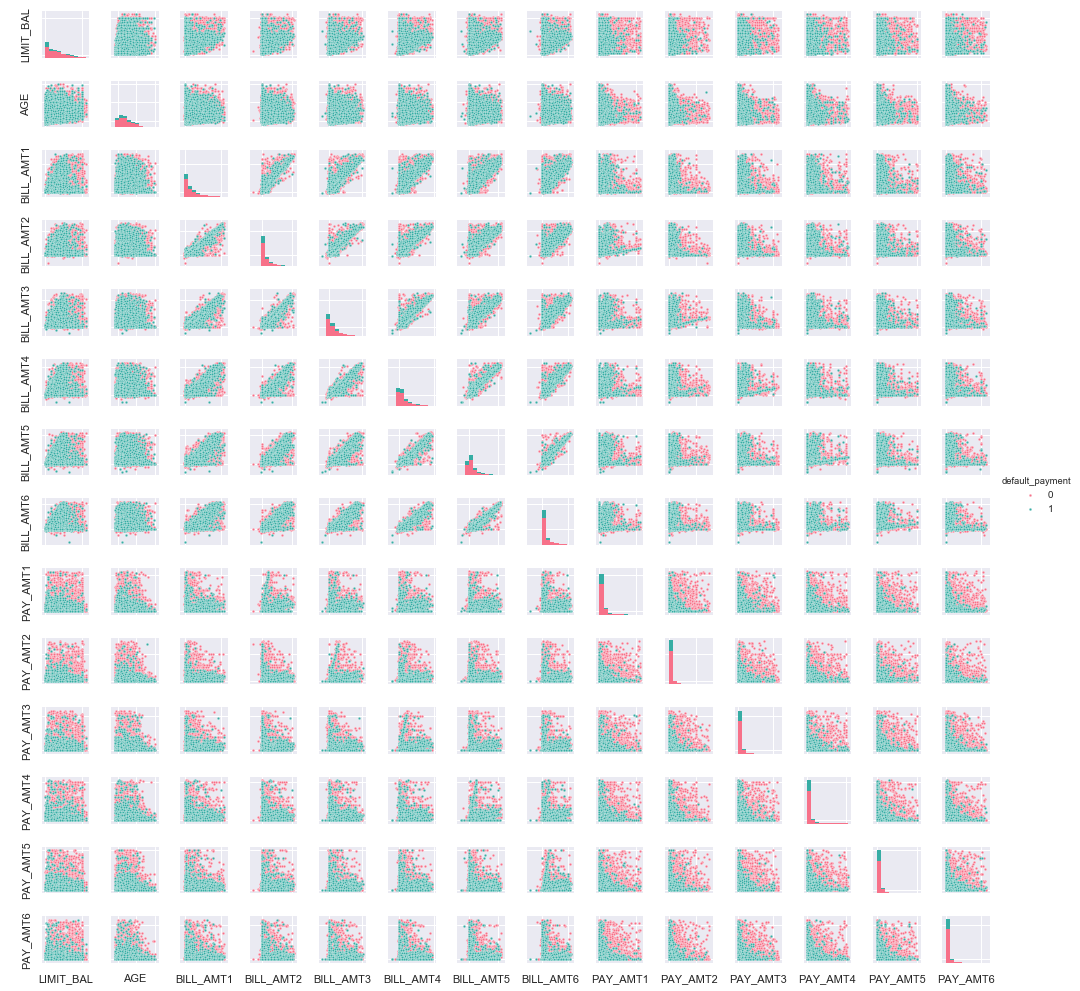

In [550]:
%config InlineBackend.figure_format = 'png' 

pp = sns.pairplot(dataset[num_with_default], hue='default_payment', diag_kind="hist", 
                  vars=num_with_default[:-1],
                  palette="husl", size=1, aspect=1, plot_kws={'s': 7})

for ax in pp.axes.flat:
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
plt.show()

It could be seen on the graph that PAY_AMTX are likely great indicators to seperate classes of the target variable.
If the payment amount in each month is quite low, the default_payment tends to occur. Meanwhile, default_payment is hard to be if the payment is much higher each month.

Let's look closer to the relationship between BILL_AMTX and PAY_AMTX,

According to the data description, BILL_AMT6, BILL_AMT5 mean the expense in April, May (2005) respectively. In fact, the payment should be paid on the following month, which were May(PAY_AMT5) and June(PAY_AMT4).

So, I try to plot the scatter plot with regression line.

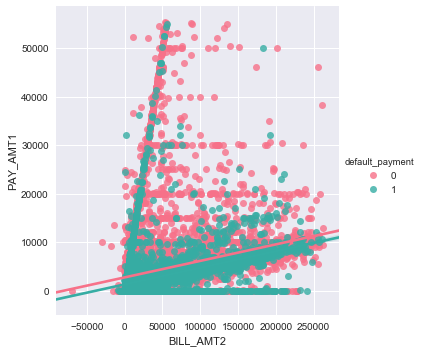

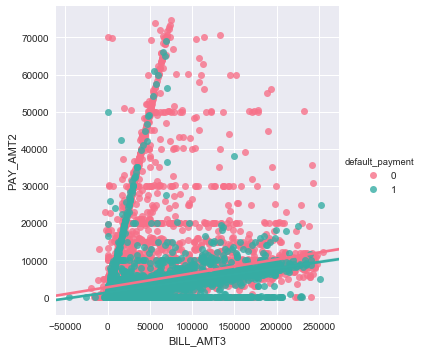

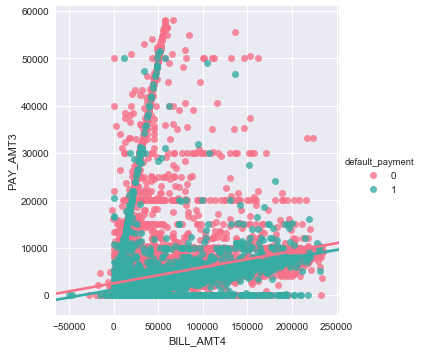

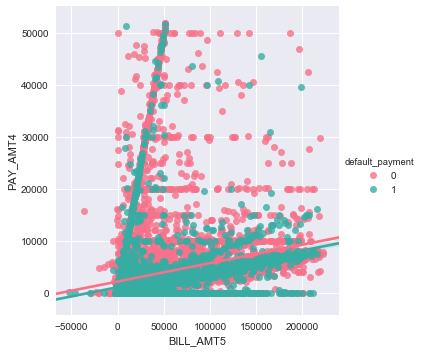

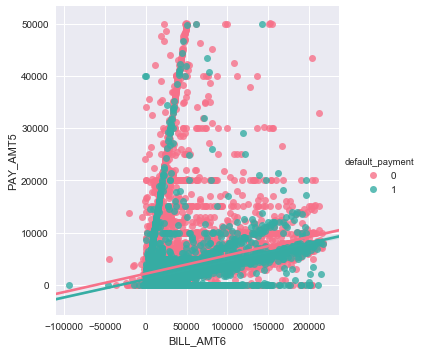

In [558]:
sns.lmplot('BILL_AMT2', 'PAY_AMT1', data=dataset, 
           hue='default_payment', fit_reg=True, palette="husl")
sns.lmplot('BILL_AMT3', 'PAY_AMT2', data=dataset, 
           hue='default_payment', fit_reg=True, palette="husl")
sns.lmplot('BILL_AMT4', 'PAY_AMT3', data=dataset, 
           hue='default_payment', fit_reg=True, palette="husl")
sns.lmplot('BILL_AMT5', 'PAY_AMT4', data=dataset, 
           hue='default_payment', fit_reg=True, palette="husl")
sns.lmplot('BILL_AMT6', 'PAY_AMT5', data=dataset, 
           hue='default_payment', fit_reg=True, palette="husl")

The result is not surprise, the expense from the current month will be paid in the next month. Furthermore, the regression line of default payment is under the no default payment line, which means the amount of payments are a bit lower than real expenses.

The next features are age and limit balance. I will check the distribution of both features.

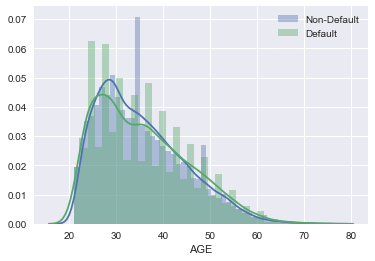

In [44]:
#Age and default
sns.distplot(dataset['AGE'][dataset['default_payment'] == 0], label = 'Non-Default');
sns.distplot(dataset['AGE'][dataset['default_payment'] == 1], label = 'Default');
plt.legend()


The distributions of default payment by ages are quite similar but the default payment rate is dropped when ages are between 25 and 40.

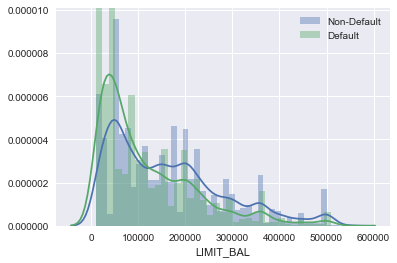

In [45]:
#Limit Balance and default
sns.distplot(dataset['LIMIT_BAL'][dataset['default_payment'] == 0], label = 'Non-Default');
sns.distplot(dataset['LIMIT_BAL'][dataset['default_payment'] == 1], label = 'Default');
plt.legend()


Default payment rate is higher to occur if the LIMIT_BAL is less than 100,000. 

Let's check the categorical variables with the target variable.

In [677]:
dataset.groupby(['default_payment','SEX']).SEX.count()

default_payment  SEX
0                1       7979
                 2      12989
1                1       2692
                 2       3539
Name: SEX, dtype: int64

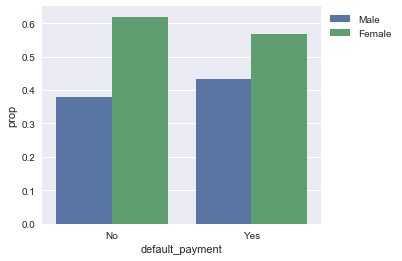

In [769]:
ax = (dataset['SEX']
 .groupby(dataset['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='default_payment', y='prop', hue='SEX'))

ax.set_xticklabels([ default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
ax.legend(bbox_to_anchor=(1.0, 1.0))

for t, l in zip(ax.legend_.texts, sex_option.values()): t.set_text(l)
plt.show()


In [681]:
dataset.groupby(['default_payment','EDUCATION']).EDUCATION.count()

default_payment  EDUCATION
0                0              14
                 1            7479
                 2            9706
                 3            3769
1                1            1878
                 2            3138
                 3            1215
Name: EDUCATION, dtype: int64

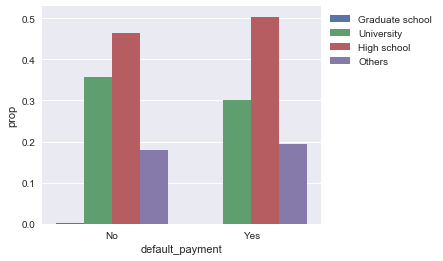

In [680]:
ax = (dataset['EDUCATION']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='default_payment', y='prop', hue='EDUCATION'))

ax.set_xticklabels([ default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
ax.legend(bbox_to_anchor=(1.0, 1.0))

for t, l in zip(ax.legend_.texts, education_option.values()): t.set_text(l)
plt.show()


In [682]:
dataset.groupby(['default_payment','MARRIAGE']).MARRIAGE.count()

default_payment  MARRIAGE
0                0              47
                 1            9323
                 2           11374
                 3             224
1                0               5
                 1            2999
                 2            3145
                 3              82
Name: MARRIAGE, dtype: int64

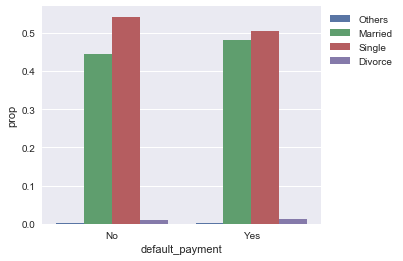

In [683]:
ax = (dataset['MARRIAGE']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='default_payment', y='prop', hue='MARRIAGE'))

ax.set_xticklabels([ default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
ax.legend(bbox_to_anchor=(1.0, 1.0))

for t, l in zip(ax.legend_.texts, marriage_option.values()): t.set_text(l)
plt.show()


In [685]:
dataset.groupby(['default_payment','PAY_1']).PAY_1.count()

default_payment  PAY_1
0                -2        2116
                 -1        4254
                  0       11415
                  1        2292
                  2         766
                  3          74
                  4          24
                  5          12
                  6           5
                  7           2
                  8           8
1                -2         342
                 -1         913
                  0        1709
                  1        1214
                  2        1739
                  3         241
                  4          44
                  5          11
                  6           5
                  7           5
                  8           8
Name: PAY_1, dtype: int64

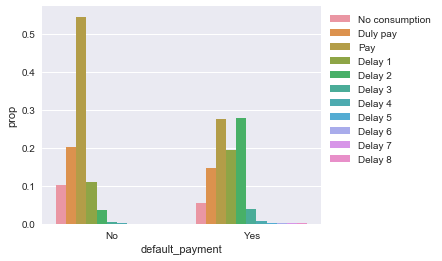

In [684]:
ax = (dataset['PAY_1']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='default_payment', y='prop', hue='PAY_1'))

ax.set_xticklabels([ default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
ax.legend(bbox_to_anchor=(1.0, 1.0))

for t, l in zip(ax.legend_.texts, pay_option.values()): t.set_text(l)
plt.show()


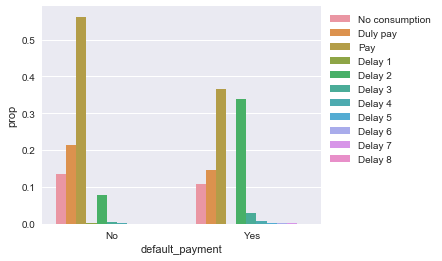

In [811]:
ax = (dataset['PAY_2']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='default_payment', y='prop', hue='PAY_2'))

ax.set_xticklabels([ default_payment_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)
ax.legend(bbox_to_anchor=(1.0, 1.0))

for t, l in zip(ax.legend_.texts, pay_option.values()): t.set_text(l)
plt.show()


## Chi square independent test

In [848]:
def independent_test(df, feature, target, threshold):
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[feature].astype(str), df[target].astype(str)), correction=True)
    if(p < threshold):
        print("{0} is important for {1}, which p-value {2} is less than threshold {3}".format(feature, target, p, threshold))
    else :
        print("{0} is not important for {1}, which p-value {2} is greater than threshold {3}".format(feature, target, p, threshold))

In [850]:
for var in cat[:-1]:
    independent_test(dataset, var, 'default_payment', 0.05)  

SEX is important for default_payment, which p-value 2.973929386401897e-13 is less than threshold 0.05
EDUCATION is important for default_payment, which p-value 4.71436420138018e-15 is less than threshold 0.05
MARRIAGE is important for default_payment, which p-value 1.2909660945042946e-07 is less than threshold 0.05
PAY_1 is important for default_payment, which p-value 0.0 is less than threshold 0.05
PAY_2 is important for default_payment, which p-value 0.0 is less than threshold 0.05
PAY_3 is important for default_payment, which p-value 0.0 is less than threshold 0.05
PAY_4 is important for default_payment, which p-value 0.0 is less than threshold 0.05
PAY_5 is important for default_payment, which p-value 0.0 is less than threshold 0.05
PAY_6 is important for default_payment, which p-value 0.0 is less than threshold 0.05


The p-value of all categorical variables after testing the chi square independent test is lower than the specificed threshold. I reject the null hypothesis, which means all variable is dependent to default_payment

## Simple classifier

According to the relationship between PAY_1 and default_payment, the proportion of no consumption, duly pay, pay of non-default customer is much higher than the default one. To prove this assumption, I will use this variable to build my simple classifier.

In [856]:
testdata = dataset.copy()
testdata['is_default'] = np.where(testdata['PAY_1']<=0, 0, 1)

If PAY_1 values are less or equal than 0, it would be non-default customer.

In [857]:
testdata[['PAY_1', 'is_default']].head()

,PAY_1,is_default
0,2,1
1,-1,0
2,0,0
3,0,0
4,-1,0


In [858]:
pd.crosstab(testdata['is_default'] , testdata['default_payment'])

default_payment,0,1
is_default,,
0,17785,2964
1,3183,3267


The crosstab shows the proportion of the correct and incorrect result from my simple classifier.
The number of valid result is 21052, (17785 + 3267). While the incorrect result is the rest, 6147.

The accuracy of this classifer is quite acceptable, around 77.40% (21052/27199)

However, there also have incorrect results. Let's change some condition on the classifer.

In [859]:
testdata['is_default2'] = np.where(testdata['PAY_1']<=1, 0, 1)
pd.crosstab(testdata['is_default2'] , testdata['default_payment'])

default_payment,0,1
is_default2,,
0,20077,4178
1,891,2053


The overall valid result is much higher, 22130 (20077 + 2053). The overall incorrect result is just 5069.

There is a significant increase in the accuracy, around 81.36% (22130/27199)

To compare the performance of two classifers, it could be obviously seen that the accuracy of the second condition seems better than the previous one. However, due to the benefits of bank firm, it might not be a big deal to have the high amount of type I error rate, accounting for 4178. Because, in fact, there are 4178 customers who cannot pay their expense while the classifer predicts that these customers are able to pay.

In the next section, I will provide more complicated algorithms for the classifier as well as the measurement to evaluate the classifier's performance.